In [346]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/install-future-program-istanbul-hackathon/sample_submission.csv
/kaggle/input/install-future-program-istanbul-hackathon/train.csv
/kaggle/input/install-future-program-istanbul-hackathon/test.csv


In [347]:


train_df = pd.read_csv('/kaggle/input/install-future-program-istanbul-hackathon/train.csv')
test_df = pd.read_csv('/kaggle/input/install-future-program-istanbul-hackathon/test.csv')


In [348]:
train_df

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28
...,...,...,...,...
312691,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17
312692,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02
312693,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14
312694,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42


In [349]:
test_df

,index,DATETIME,SERVER
0,0,2020-05-31 00:00:00+03:00,CIHAZ_301
1,1,2020-05-31 00:00:00+03:00,CIHAZ_305
2,2,2020-05-31 00:15:00+03:00,CIHAZ_301
3,3,2020-05-31 00:15:00+03:00,CIHAZ_305
4,4,2020-05-31 00:30:00+03:00,CIHAZ_301
...,...,...,...
187,187,2020-05-31 23:15:00+03:00,CIHAZ_305
188,188,2020-05-31 23:30:00+03:00,CIHAZ_301
189,189,2020-05-31 23:30:00+03:00,CIHAZ_305
190,190,2020-05-31 23:45:00+03:00,CIHAZ_301


In [350]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Missing value controlu

In [351]:
train_df.isnull().sum()

DATETIME    0
SERVER      0
CPU         0
CPULOAD     0
dtype: int64

Checking Duplicates

In [352]:
train_df[train_df.duplicated(subset=['DATETIME','SERVER','CPU'])]

,DATETIME,SERVER,CPU,CPULOAD


Datetime versisin çevrilmesi


In [353]:
train_df['DATETIME'] = pd.to_datetime(train_df['DATETIME'])
train_df['HOUR'] = train_df['DATETIME'].dt.hour
train_df['MINUTE'] = train_df['DATETIME'].dt.minute
train_df['DAY'] = train_df['DATETIME'].dt.day
train_df['MONTH'] = train_df['DATETIME'].dt.month

In [354]:
train_df['wd']=0
train_df.loc[train_df[(train_df['DAY']==28) & (train_df['MONTH']==3)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==29) & (train_df['MONTH']==3)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==4) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==5) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==11) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==12) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==18) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==19) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==25) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==26) & (train_df['MONTH']==4)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==2) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==3) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==9) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==10) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==16) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==17) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==23) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==24) & (train_df['MONTH']==5)].index,'wd']=1
train_df.loc[train_df[(train_df['DAY']==30) & (train_df['MONTH']==5)].index,'wd']=1

In [332]:
train_df.groupby('wd')['CPULOAD'].mean() # bir olanları belirli katsayı ile çarp.

wd
0    10.908024
1     8.669308
Name: CPULOAD, dtype: float64

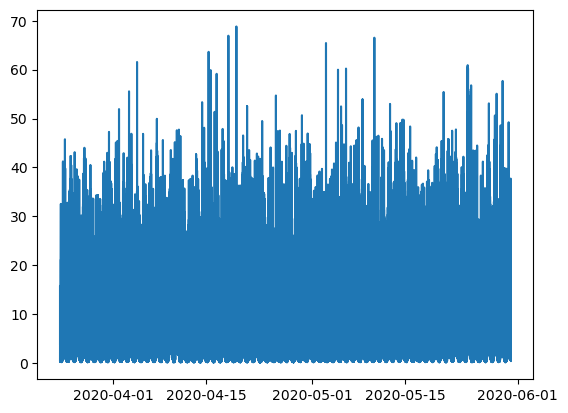

In [192]:
import matplotlib.pyplot as plt
plt.plot(train_df['DATETIME'],train_df['CPULOAD'])

In [333]:
may_data= train_df[(train_df['DATETIME'].dt.month == 5) & (train_df['DATETIME'].dt.day >= 15) & (train_df['DATETIME'].dt.day <= 30)]
may_data

,DATETIME,SERVER,CPU,CPULOAD,HOUR,MINUTE,DAY,MONTH,wd
239112,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-0,5.56,0,0,15,5,0
239113,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-1,15.31,0,0,15,5,0
239114,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-10,4.17,0,0,15,5,0
239115,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-11,14.38,0,0,15,5,0
239116,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-12,0.84,0,0,15,5,0
...,...,...,...,...,...,...,...,...,...
312691,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17,23,45,30,5,1
312692,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02,23,45,30,5,1
312693,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14,23,45,30,5,1
312694,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42,23,45,30,5,1


Anomali tespiti yapılacak datanın ayrılması

1


In [26]:
avg_cpuload = may_data.groupby('SERVER')['CPULOAD'].describe().reset_index()
avg_cpuload

,SERVER,count,mean,std,min,25%,50%,75%,max
0,CIHAZ_301,36816.0,8.064778,8.914812,0.08,1.3600,3.90,12.53,57.69
1,CIHAZ_305,36768.0,14.725057,11.427310,0.14,5.5375,11.21,23.12,60.92


In [27]:
#may_data[may_data['SERVER']=='CIHAZ_301' & may_data['CPULOAD']>1.36 & may_data['CPULOAD'] < 12.53  ]

In [249]:
#may_data_1=pd.DataFrame([may_data[(may_data['SERVER']=='CIHAZ_301') & (may_data['CPULOAD']>1.36) & (may_data['CPULOAD'] < 12.53 ) ]])[0]
#may_data_2=pd.DataFrame([may_data[(may_data['SERVER']=='CIHAZ_305') & (may_data['CPULOAD']>5.53) & (may_data['CPULOAD'] < 23.12)  ]])[0]

In [250]:
all_may=pd.concat([may_data_1[0],may_data_2[0]],ignore_index=True)

all_may

,DATETIME,SERVER,CPU,CPULOAD,HOUR,MINUTE
0,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-0,5.56,0,0
1,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-10,4.17,0,0
2,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-13,2.38,0,0
3,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-22,2.03,0,0
4,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-23,2.43,0,0
...,...,...,...,...,...,...
36761,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17,23,45
36762,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02,23,45
36763,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14,23,45
36764,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42,23,45


In [154]:
may_data

,DATETIME,SERVER,CPU,CPULOAD,HOUR,MINUTE
239112,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-0,5.56,0,0
239113,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-1,15.31,0,0
239114,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-10,4.17,0,0
239115,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-11,14.38,0,0
239116,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-12,0.84,0,0
...,...,...,...,...,...,...
312691,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17,23,45
312692,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02,23,45
312693,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14,23,45
312694,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42,23,45


In [251]:
train_df=train_df[~train_df['CPULOAD'].isin(may_data)]
train_df=pd.concat([train_df,all_may],ignore_index=True)
train_df

,DATETIME,SERVER,CPU,CPULOAD,HOUR,MINUTE
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88,0,0
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33,0,0
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31,0,0
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25,0,0
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28,0,0
...,...,...,...,...,...,...
349457,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17,23,45
349458,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02,23,45
349459,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14,23,45
349460,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42,23,45


In [355]:
from sklearn.ensemble import IsolationForest
may_data

,DATETIME,SERVER,CPU,CPULOAD,HOUR,MINUTE,DAY,MONTH,wd,scores,anomaly
239112,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-0,5.56,0,0,15,5,0,0.074127,1
239113,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-1,15.31,0,0,15,5,0,0.011574,1
239114,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-10,4.17,0,0,15,5,0,0.061538,1
239115,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-11,14.38,0,0,15,5,0,0.036860,1
239116,2020-05-15 00:00:00+03:00,CIHAZ_301,CPU-12,0.84,0,0,15,5,0,0.075906,1
...,...,...,...,...,...,...,...,...,...,...,...
312691,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17,23,45,30,5,1,0.023101,1
312692,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02,23,45,30,5,1,0.019082,1
312693,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14,23,45,30,5,1,0.033791,1
312694,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42,23,45,30,5,1,0.017860,1


In [356]:
may_data= train_df[(train_df['DATETIME'].dt.month == 5) & (train_df['DATETIME'].dt.day >= 15) & (train_df['DATETIME'].dt.day <= 30)]
model=IsolationForest(max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(may_data[['CPULOAD']])
may_data['scores']=model.decision_function(may_data[['CPULOAD']])
may_data['anomaly']=model.predict(may_data[['CPULOAD']])


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/tmp/ipykernel_32/529130430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_data['scores']=model.decision_function(may_data[['CPULOAD']])
/tmp/ipykernel_32/529130430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_data['anomaly']=model.predict(may_data[['CPULOAD']])


In [357]:
may_data[may_data['anomaly']==1].index

Int64Index([239112, 239113, 239114, 239115, 239116, 239117, 239118, 239119,
            239120, 239121,
            ...
            312686, 312687, 312688, 312689, 312690, 312691, 312692, 312693,
            312694, 312695],
           dtype='int64', length=66229)

In [358]:
train_df.drop(index=may_data[may_data['anomaly']==1].index,inplace=True,axis=1)

In [359]:
cpu=pd.DataFrame(train_df.groupby(['DATETIME','SERVER'])['CPULOAD'].sum()/24)
cpu.reset_index()
train_df=train_df.merge(cpu, on=['DATETIME','SERVER'])

In [360]:
train_df

,DATETIME,SERVER,CPU,CPULOAD_x,HOUR,MINUTE,DAY,MONTH,wd,CPULOAD_y
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88,0,0,24,3,0,4.425000
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33,0,0,24,3,0,4.425000
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31,0,0,24,3,0,4.425000
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25,0,0,24,3,0,4.425000
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28,0,0,24,3,0,4.425000
...,...,...,...,...,...,...,...,...,...,...
246462,2020-05-30 20:15:00+03:00,CIHAZ_305,CPU-9,29.77,20,15,30,5,1,1.240417
246463,2020-05-30 20:45:00+03:00,CIHAZ_305,CPU-9,29.03,20,45,30,5,1,1.209583
246464,2020-05-30 22:45:00+03:00,CIHAZ_301,CPU-12,37.70,22,45,30,5,1,1.570833
246465,2020-05-30 22:45:00+03:00,CIHAZ_305,CPU-13,32.24,22,45,30,5,1,2.675833


In [184]:
train_df.groupby('HOUR')['CPULOAD_y']

<Axes: xlabel='HOUR', ylabel='CPULOAD_y'>

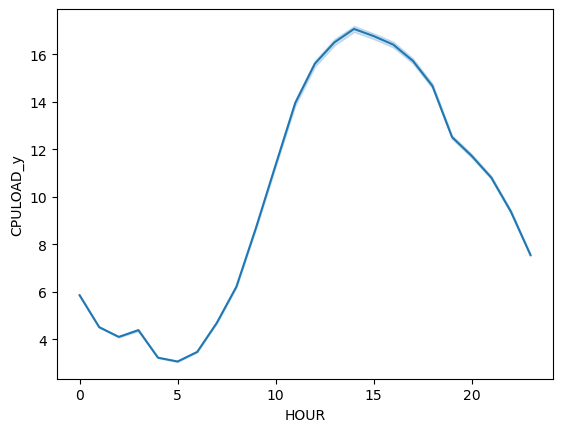

In [340]:
sns.lineplot(data=train_df,x='HOUR',y='CPULOAD_y')

In [341]:
train_df.groupby('HOUR')['CPULOAD_y'].mean()

HOUR
0      5.851273
1      4.506647
2      4.095544
3      4.380917
4      3.220150
5      3.058705
6      3.463560
7      4.686997
8      6.210584
9      8.694319
10    11.334146
11    13.947002
12    15.600119
13    16.501350
14    17.065490
15    16.764085
16    16.405083
17    15.721684
18    14.662228
19    12.507659
20    11.720205
21    10.804891
22     9.371859
23     7.544582
Name: CPULOAD_y, dtype: float64

bazı saatlerde gözle görülür şekilde cpu işlemesi yüksek, onlar işaretlendi

In [361]:
train_df['hourly_c']=0
train_df.loc[train_df[train_df['HOUR']==10].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==11].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==12].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==13].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==14].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==15].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==16].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==17].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==18].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==19].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==20].index,'hourly_c']=1
train_df.loc[train_df[train_df['HOUR']==21].index,'hourly_c']=1


In [363]:
train_df

,DATETIME,SERVER,CPU,CPULOAD_x,HOUR,MINUTE,DAY,MONTH,wd,CPULOAD_y,hourly_c
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88,0,0,24,3,0,4.425000,0
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33,0,0,24,3,0,4.425000,0
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31,0,0,24,3,0,4.425000,0
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25,0,0,24,3,0,4.425000,0
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28,0,0,24,3,0,4.425000,0
...,...,...,...,...,...,...,...,...,...,...,...
246462,2020-05-30 20:15:00+03:00,CIHAZ_305,CPU-9,29.77,20,15,30,5,1,1.240417,1
246463,2020-05-30 20:45:00+03:00,CIHAZ_305,CPU-9,29.03,20,45,30,5,1,1.209583,1
246464,2020-05-30 22:45:00+03:00,CIHAZ_301,CPU-12,37.70,22,45,30,5,1,1.570833,0
246465,2020-05-30 22:45:00+03:00,CIHAZ_305,CPU-13,32.24,22,45,30,5,1,2.675833,0


expanding window statisctics

In [311]:
train_df['expanding_mean'] = train_df['CPULOAD_x'].expanding(2).mean()
data = train_df[['DATETIME','CPULOAD_x', 'expanding_mean']]


In [312]:
data

,DATETIME,CPULOAD_x,expanding_mean
0,2020-03-24 00:00:00+03:00,3.88,NaN
1,2020-03-24 00:00:00+03:00,11.33,7.605000
2,2020-03-24 00:00:00+03:00,5.31,6.840000
3,2020-03-24 00:00:00+03:00,5.25,6.442500
4,2020-03-24 00:00:00+03:00,0.28,5.210000
...,...,...,...
246441,2020-05-30 21:00:00+03:00,28.18,10.601667
246442,2020-05-30 21:00:00+03:00,28.18,10.601739
246443,2020-05-30 22:45:00+03:00,37.70,10.601849
246444,2020-05-30 22:45:00+03:00,32.24,10.601936


In [342]:
data['expanding_mean'].plot(x=data['DATETIME'])

,DATETIME,CPULOAD_x,expanding_mean
0,2020-03-24 00:00:00+03:00,3.88,NaN
1,2020-03-24 00:00:00+03:00,11.33,7.605000
2,2020-03-24 00:00:00+03:00,5.31,6.840000
3,2020-03-24 00:00:00+03:00,5.25,6.442500
4,2020-03-24 00:00:00+03:00,0.28,5.210000
...,...,...,...
246441,2020-05-30 21:00:00+03:00,28.18,10.601667
246442,2020-05-30 21:00:00+03:00,28.18,10.601739
246443,2020-05-30 22:45:00+03:00,37.70,10.601849
246444,2020-05-30 22:45:00+03:00,32.24,10.601936


In [308]:
# Rolling mean
temps = pd.DataFrame(train_df['CPULOAD_x'].values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = pd.concat([means, temps], axis=1)
dataframe.columns = ['mean(t-2,t-1)', 't+1']
print(dataframe)

        mean(t-2,t-1)    t+1
0                 NaN   3.88
1                 NaN  11.33
2               7.605   5.31
3               8.320   5.25
4               5.280   0.28
...               ...    ...
246441         29.205  28.18
246442         28.410  28.18
246443         28.180  37.70
246444         32.940  32.24
246445         34.970  31.98

[246446 rows x 2 columns]


In [272]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(
    train_df[['SERVER','wd']]).toarray())
  
# Merge with main
train_df_enc = train_df.join(enc_data)


In [162]:
train_df_enc

,DATETIME,CPULOAD_y,0,1
0,2020-03-24 00:00:00+03:00,106.20,1.0,0.0
1,2020-03-24 00:00:00+03:00,106.20,1.0,0.0
2,2020-03-24 00:00:00+03:00,106.20,1.0,0.0
3,2020-03-24 00:00:00+03:00,106.20,1.0,0.0
4,2020-03-24 00:00:00+03:00,106.20,1.0,0.0
...,...,...,...,...
349457,2020-05-30 23:45:00+03:00,398.52,0.0,1.0
349458,2020-05-30 23:45:00+03:00,398.52,0.0,1.0
349459,2020-05-30 23:45:00+03:00,398.52,0.0,1.0
349460,2020-05-30 23:45:00+03:00,398.52,0.0,1.0


Time Series


In [123]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
train_df_enc


,DATETIME,SERVER,CPU,CPULOAD,HOUR,MINUTE,0,1
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88,0,0,1.0,0.0
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33,0,0,1.0,0.0
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31,0,0,1.0,0.0
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25,0,0,1.0,0.0
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...
349457,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-5,16.17,23,45,0.0,1.0
349458,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-6,16.02,23,45,0.0,1.0
349459,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-7,14.14,23,45,0.0,1.0
349460,2020-05-30 23:45:00+03:00,CIHAZ_305,CPU-8,15.42,23,45,0.0,1.0


In [132]:
from statsmodels.tsa.stattools import adfuller
pvalue_adf = adfuller(x=train_df_enc['CPULOAD_y'],regression='c')
print(f'test statistics: {pvalue_adf[0]}')
print(f'p-value: {pvalue_adf[1]}')
for key, value in pvalue_adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

test statistics: -4.637675322695817
p-value: 0.0001100183696721053
Critial Values:
   1%, -3.430368717650292
Critial Values:
   5%, -2.861548272973253
Critial Values:
   10%, -2.566774403402831


P değerimiz 0.05 ten düşük olduğu için ya da test istatistiği değerimiz kritik değerlerden küçük olduğu için serimiz durağandır

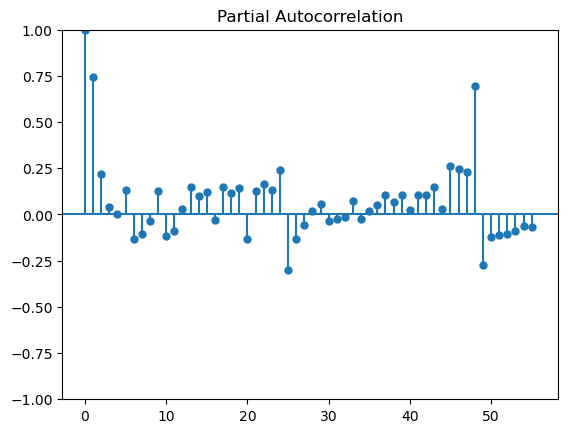

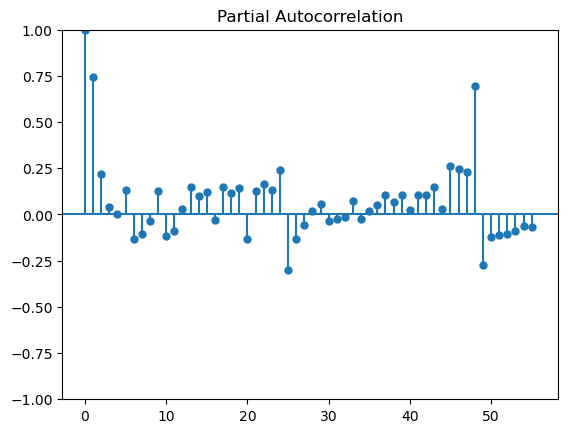

In [99]:
plot_pacf(x=train_df_copy['CPULOAD_x'], alpha=0.05,use_vlines=True, title="Partial Autocorrelation")


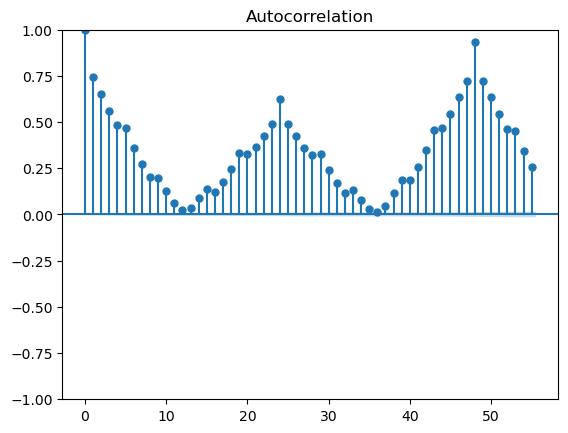

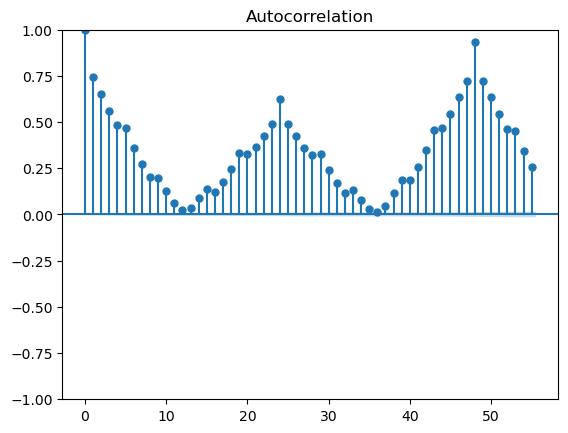

In [100]:
plot_acf(x=train_df_copy['CPULOAD_x'], title="Autocorrelation")


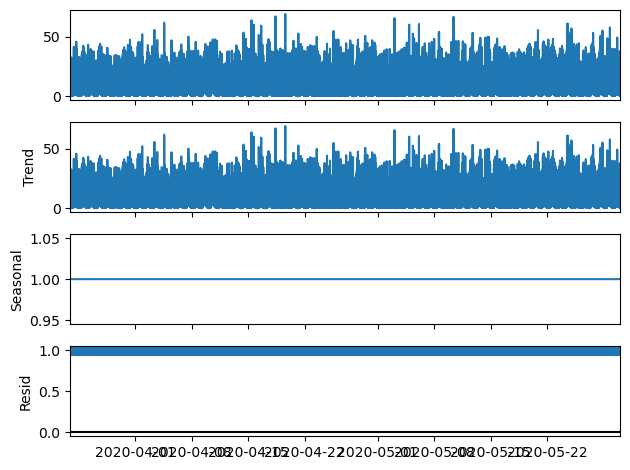

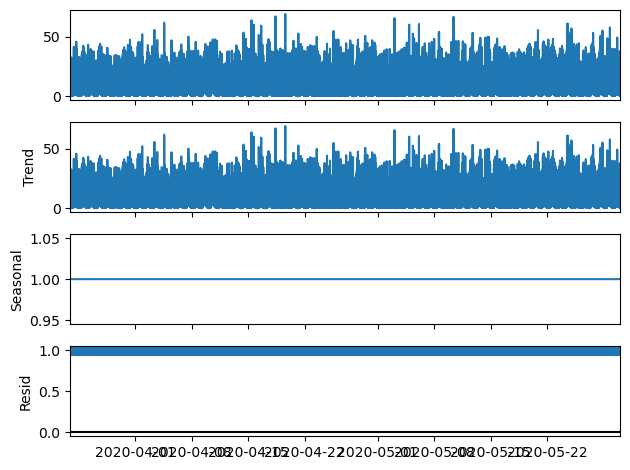

In [135]:
from statsmodels.tsa.seasonal import seasonal_decompose
train_df_copy.sort_index(inplace=True)
analysis = train_df_copy[['CPULOAD_x']].copy()
decomposition = seasonal_decompose(analysis, model="multiplicative",period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition.plot()


Model TAHMİNLERİ



1

In [166]:
test_df = pd.read_csv('/kaggle/input/install-future-program-istanbul-hackathon/test.csv')


,index,DATETIME,SERVER
0,0,2020-05-31 00:00:00+03:00,CIHAZ_301
1,1,2020-05-31 00:00:00+03:00,CIHAZ_305
2,2,2020-05-31 00:15:00+03:00,CIHAZ_301
3,3,2020-05-31 00:15:00+03:00,CIHAZ_305
4,4,2020-05-31 00:30:00+03:00,CIHAZ_301
...,...,...,...
187,187,2020-05-31 23:15:00+03:00,CIHAZ_305
188,188,2020-05-31 23:30:00+03:00,CIHAZ_301
189,189,2020-05-31 23:30:00+03:00,CIHAZ_305
190,190,2020-05-31 23:45:00+03:00,CIHAZ_301


In [366]:
a=pd.get_dummies(train_df['SERVER'])
train_df = train_df.join(a)
train_df.drop("SERVER",axis=1,inplace=True)

In [367]:
test_df['DATETIME'] = pd.to_datetime(test_df['DATETIME'])


In [368]:
a=pd.get_dummies(test_df['SERVER'])
test_df_enc = test_df.join(a)
test_df_enc.drop("SERVER",axis=1,inplace=True)

In [369]:
test_df_enc.drop(['index'],axis=1,inplace=True)

tmforum :innova

In [371]:
train_df

,DATETIME,CPU,CPULOAD_x,HOUR,MINUTE,DAY,MONTH,wd,CPULOAD_y,hourly_c,CIHAZ_301,CIHAZ_305
0,2020-03-24 00:00:00+03:00,CPU-0,3.88,0,0,24,3,0,4.425000,0,1,0
1,2020-03-24 00:00:00+03:00,CPU-1,11.33,0,0,24,3,0,4.425000,0,1,0
2,2020-03-24 00:00:00+03:00,CPU-10,5.31,0,0,24,3,0,4.425000,0,1,0
3,2020-03-24 00:00:00+03:00,CPU-11,5.25,0,0,24,3,0,4.425000,0,1,0
4,2020-03-24 00:00:00+03:00,CPU-12,0.28,0,0,24,3,0,4.425000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
246462,2020-05-30 20:15:00+03:00,CPU-9,29.77,20,15,30,5,1,1.240417,1,0,1
246463,2020-05-30 20:45:00+03:00,CPU-9,29.03,20,45,30,5,1,1.209583,1,0,1
246464,2020-05-30 22:45:00+03:00,CPU-12,37.70,22,45,30,5,1,1.570833,0,1,0
246465,2020-05-30 22:45:00+03:00,CPU-13,32.24,22,45,30,5,1,2.675833,0,0,1


In [372]:
test_df_enc

,DATETIME,CIHAZ_301,CIHAZ_305
0,2020-05-31 00:00:00+03:00,1,0
1,2020-05-31 00:00:00+03:00,0,1
2,2020-05-31 00:15:00+03:00,1,0
3,2020-05-31 00:15:00+03:00,0,1
4,2020-05-31 00:30:00+03:00,1,0
...,...,...,...
187,2020-05-31 23:15:00+03:00,0,1
188,2020-05-31 23:30:00+03:00,1,0
189,2020-05-31 23:30:00+03:00,0,1
190,2020-05-31 23:45:00+03:00,1,0


In [438]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_test_pred = model.predict(test_data_enc)

In [346]:
#Model 2
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', seed = 123)
xgb_r.fit(x_train, y_train)
y_pred=xgb_r.predict(test_data_enc)


[19:30:07] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [364]:
x_train.shape

(246465, 2)

In [394]:
#model 3
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,  LSTM, Flatten
from keras import metrics

model = Sequential()
model.add(LSTM(64,activation = 'tanh',recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error',optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(x_train,y_train,epochs=100,verbose=2)
Predict = model.predict(test_df_enc)


In [85]:
train_df_enc

,DATETIME,CPULOAD_y,CIHAZ_301,CIHAZ_305
0,2020-03-24 00:00:00+03:00,4.425000,1.0,0.0
24,2020-03-24 00:00:00+03:00,7.084167,0.0,1.0
48,2020-03-24 00:15:00+03:00,4.427500,1.0,0.0
72,2020-03-24 00:15:00+03:00,6.490833,0.0,1.0
96,2020-03-24 00:30:00+03:00,3.910417,1.0,0.0
...,...,...,...,...
246393,2020-05-30 20:00:00+03:00,2.469167,1.0,0.0
246395,2020-05-30 20:15:00+03:00,1.240417,0.0,1.0
246396,2020-05-30 20:45:00+03:00,1.209583,0.0,1.0
246397,2020-05-30 22:45:00+03:00,1.570833,1.0,0.0


In [62]:
#Model 4
import statsmodels.api as sm
model= sm.tsa.ARIMA(y_train,order=(2,0,0))
model_fit=model.fit()
print(model_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              CPULOAD_y   No. Observations:                11362
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -19558.094
Date:                Thu, 13 Jul 2023   AIC                          39124.187
Time:                        06:16:07   BIC                          39153.539
Sample:                             0   HQIC                         39134.060
                              - 11362                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5783      0.860     11.139      0.000       7.893      11.264
ar.L1          0.0089      0.002      4.281      0.000       0.005       0.013
ar.L2          0.9758      0.002    565.837      0.0

/tmp/ipykernel_32/655133458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet['DATETIME']=train_data_prophet['DATETIME'].dt.tz_localize(None)
07:53:02 - cmdstanpy - INFO - Chain [1] start processing
07:53:07 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_32/655133458.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_prophet.rename(columns = {'DATETIME':'ds'}, inplace = True)


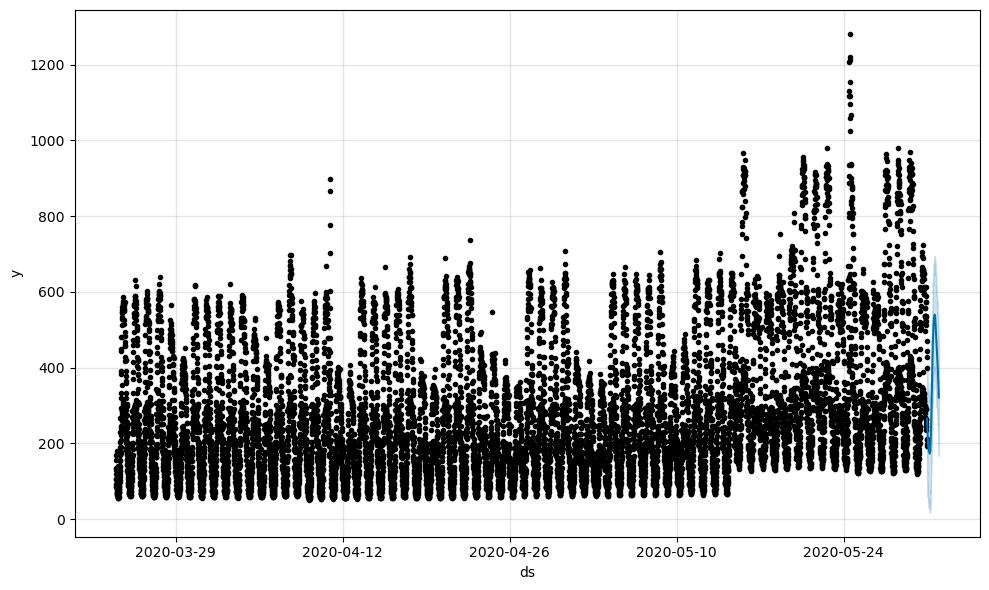

In [176]:
from prophet import Prophet
model = Prophet()
train_data_prophet=train_df_enc[['DATETIME','CPULOAD_y']]
train_data_prophet['DATETIME']=train_data_prophet['DATETIME'].dt.tz_localize(None)
train_data_prophet.columns=['ds','y']
model.fit(train_data_prophet)

test_data_prophet=test_df[['DATETIME']]
test_data_prophet.rename(columns = {'DATETIME':'ds'}, inplace = True)
test_data_prophet_2=pd.DataFrame()
test_data_prophet_2['ds']=test_data_prophet['ds']
test_data_prophet_2['ds']=test_data_prophet_2['ds'].dt.tz_localize(None)

#Forecasting
forecast_prediction = model.predict(test_data_prophet_2)
forecast_prediction.tail()
plot1 = model.plot(forecast_prediction)


In [177]:
forecast_prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-05-31 00:00:00,396.206195,112.789918,392.687757,396.206195,396.206195,-130.739109,-130.739109,-130.739109,-76.774421,-76.774421,-76.774421,-53.964687,-53.964687,-53.964687,0.0,0.0,0.0,265.467087
1,2020-05-31 00:00:00,396.206195,127.316639,404.533959,396.206195,396.206195,-130.739109,-130.739109,-130.739109,-76.774421,-76.774421,-76.774421,-53.964687,-53.964687,-53.964687,0.0,0.0,0.0,265.467087
2,2020-05-31 00:15:00,396.232466,105.961066,405.014151,396.232466,396.232466,-141.088376,-141.088376,-141.088376,-87.033118,-87.033118,-87.033118,-54.055258,-54.055258,-54.055258,0.0,0.0,0.0,255.144090
3,2020-05-31 00:15:00,396.232466,102.551551,398.435691,396.232466,396.232466,-141.088376,-141.088376,-141.088376,-87.033118,-87.033118,-87.033118,-54.055258,-54.055258,-54.055258,0.0,0.0,0.0,255.144090
4,2020-05-31 00:30:00,396.258737,97.593237,384.908417,396.258737,396.258737,-150.967928,-150.967928,-150.967928,-96.839608,-96.839608,-96.839608,-54.128320,-54.128320,-54.128320,0.0,0.0,0.0,245.290809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020-05-31 23:15:00,398.649373,200.055495,488.998039,398.368285,398.921508,-57.078722,-57.078722,-57.078722,-44.825529,-44.825529,-44.825529,-12.253193,-12.253193,-12.253193,0.0,0.0,0.0,341.570651
188,2020-05-31 23:30:00,398.675644,193.111355,480.479112,398.391756,398.949756,-67.191735,-67.191735,-67.191735,-55.511254,-55.511254,-55.511254,-11.680481,-11.680481,-11.680481,0.0,0.0,0.0,331.483909
189,2020-05-31 23:30:00,398.675644,176.504292,475.064844,398.388956,398.951733,-67.191735,-67.191735,-67.191735,-55.511254,-55.511254,-55.511254,-11.680481,-11.680481,-11.680481,0.0,0.0,0.0,331.483909
190,2020-05-31 23:45:00,398.701915,167.219781,471.934184,398.412427,398.979981,-77.328737,-77.328737,-77.328737,-66.213993,-66.213993,-66.213993,-11.114744,-11.114744,-11.114744,0.0,0.0,0.0,321.373178


In [384]:
test_df_d=test_df['DATETIME']
test_df_d

0     2020-05-31 00:00:00+03:00
1     2020-05-31 00:00:00+03:00
2     2020-05-31 00:15:00+03:00
3     2020-05-31 00:15:00+03:00
4     2020-05-31 00:30:00+03:00
                 ...           
187   2020-05-31 23:15:00+03:00
188   2020-05-31 23:30:00+03:00
189   2020-05-31 23:30:00+03:00
190   2020-05-31 23:45:00+03:00
191   2020-05-31 23:45:00+03:00
Name: DATETIME, Length: 192, dtype: datetime64[ns, pytz.FixedOffset(180)]

In [386]:
all_data

,DATETIME,CPULOAD_y
0,2020-03-24 00:00:00+03:00,4.425000
1,2020-03-24 00:00:00+03:00,4.425000
2,2020-03-24 00:00:00+03:00,4.425000
3,2020-03-24 00:00:00+03:00,4.425000
4,2020-03-24 00:00:00+03:00,4.425000
...,...,...
246462,2020-05-30 20:15:00+03:00,1.240417
246463,2020-05-30 20:45:00+03:00,1.209583
246464,2020-05-30 22:45:00+03:00,1.570833
246465,2020-05-30 22:45:00+03:00,2.675833


In [389]:
test_df

,index,DATETIME,SERVER
0,0,2020-05-31 00:00:00+03:00,CIHAZ_301
1,1,2020-05-31 00:00:00+03:00,CIHAZ_305
2,2,2020-05-31 00:15:00+03:00,CIHAZ_301
3,3,2020-05-31 00:15:00+03:00,CIHAZ_305
4,4,2020-05-31 00:30:00+03:00,CIHAZ_301
...,...,...,...
187,187,2020-05-31 23:15:00+03:00,CIHAZ_305
188,188,2020-05-31 23:30:00+03:00,CIHAZ_301
189,189,2020-05-31 23:30:00+03:00,CIHAZ_305
190,190,2020-05-31 23:45:00+03:00,CIHAZ_301


In [388]:
all_data

,DATETIME,CPULOAD_y
0,2020-03-24 00:00:00+03:00,4.425000
1,2020-03-24 00:00:00+03:00,4.425000
2,2020-03-24 00:00:00+03:00,4.425000
3,2020-03-24 00:00:00+03:00,4.425000
4,2020-03-24 00:00:00+03:00,4.425000
...,...,...
246462,2020-05-30 20:15:00+03:00,1.240417
246463,2020-05-30 20:45:00+03:00,1.209583
246464,2020-05-30 22:45:00+03:00,1.570833
246465,2020-05-30 22:45:00+03:00,2.675833


In [393]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=sm.tsa.statespace.SARIMAX(train_df['CPULOAD_y'],order=(2, 0, 1),seasonal_order=(0,0,2,12))
results=model.fit()
=results.predict(test_data, start=0,end=192,typ='levels',dynamic=True)


In [515]:
#mODEL 5
train_df_enc
#test_df_enc

,DATETIME,CPULOAD_y,CIHAZ_301,CIHAZ_305,HOUR
0,2020-03-24 00:00:00+03:00,4.425000,1.0,0.0,0
24,2020-03-24 00:00:00+03:00,7.084167,0.0,1.0,0
48,2020-03-24 00:15:00+03:00,4.427500,1.0,0.0,0
72,2020-03-24 00:15:00+03:00,6.490833,0.0,1.0,0
96,2020-03-24 00:30:00+03:00,3.910417,1.0,0.0,0
...,...,...,...,...,...
246456,2020-05-30 20:00:00+03:00,2.469167,1.0,0.0,20
246458,2020-05-30 20:15:00+03:00,1.240417,0.0,1.0,20
246459,2020-05-30 20:45:00+03:00,1.209583,0.0,1.0,20
246460,2020-05-30 22:45:00+03:00,1.570833,1.0,0.0,22


In [180]:
predictions = pd.DataFrame({'DATETIME': test_df['DATETIME'], 'SERVER': test_df['SERVER'], 'CPULOAD': forecast_prediction['yhat']})
predictions['index'] = range(len(predictions))

# Step 10: Export predictions to CSV
predictions.to_csv('sample_submission_p_2.csv', index=False, columns=['index', 'CPULOAD'])